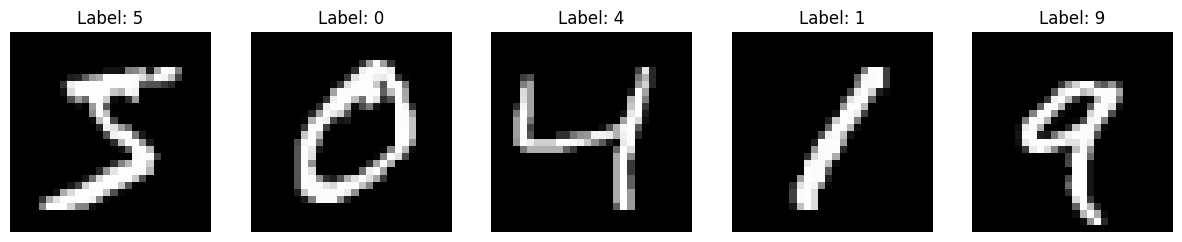

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 35ms/step - accuracy: 0.8862 - loss: 0.3786 - val_accuracy: 0.9793 - val_loss: 0.0634
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9825 - loss: 0.0567 - val_accuracy: 0.9844 - val_loss: 0.0440
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - accuracy: 0.9880 - loss: 0.0355 - val_accuracy: 0.9886 - val_loss: 0.0360
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9921 - loss: 0.0260 - val_accuracy: 0.9889 - val_loss: 0.0348
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9928 - loss: 0.0219 - val_accuracy: 0.9884 - val_loss: 0.0366


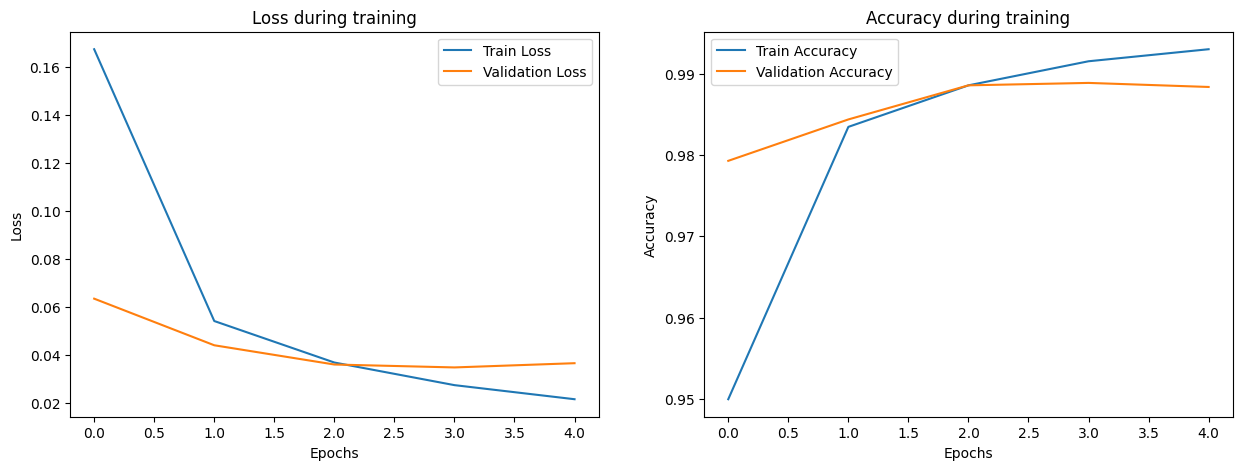

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9859 - loss: 0.0448
Test Accuracy: 0.9883999824523926
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


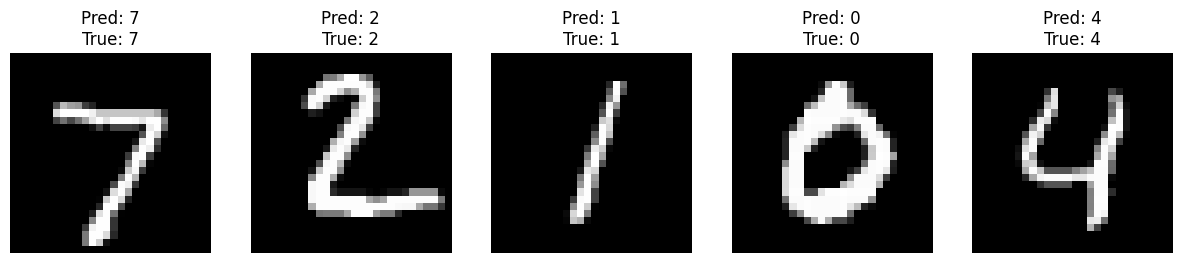

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

# 1. 데이터셋 준비
# MNIST 데이터셋 로드 (학습 데이터와 테스트 데이터로 분리)
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 데이터 전처리
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# 라벨을 원-핫 인코딩 처리
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# 2. 데이터 일부 출력 (데이터셋 가시화)
# 학습용 데이터 중 첫 5개 이미지를 출력하여 데이터 확인
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(train_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Label: {train_labels[i].argmax()}')
    axes[i].axis('off')
plt.show()

# 3. 모델 구성
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# 4. 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 5. 모델 학습
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# 6. 학습 결과 가시화: 손실과 정확도 변화 그래프
# 학습 과정에서의 손실 함수와 정확도를 그래프로 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 손실 함수 그래프
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Loss during training')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# 정확도 그래프
axes[1].plot(history.history['accuracy'], label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Accuracy during training')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.show()

# 7. 성능 평가: 테스트 데이터셋을 통한 정확도 측정
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

# 8. 테스트 데이터에 대한 예측 결과 시각화
# 테스트 데이터에서 첫 5개 이미지를 예측하고 시각화
predictions = model.predict(test_images[:5])

fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(test_images[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f'Pred: {predictions[i].argmax()}\nTrue: {test_labels[i].argmax()}')
    axes[i].axis('off')
plt.show()
